In [13]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

In [14]:
path = "C:\\Users\\acorn\\Desktop\\2019-Machine-Learning-Course-master\\2019-Machine-Learning-Course-master\\3일차_의사결정나무및앙상블\\의사결정나무\\실습자료\\practice\\online_news\\onlinenews.csv"
data = pd.read_csv(path, engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop([' shares'], axis=1)
y = data[' shares']

- Data has 39644 rows and 60 columns.
- Column names:  [' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/10,
                                                    random_state=2015010720)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=1/9,
                                                      random_state=2015010720)

In [10]:
clf_dt = DecisionTreeRegressor(criterion='mse', max_depth=None)
clf_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)

In [15]:
# Show train & validation accuracies
print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))

- MSE (Train)      : 0.0
- MSE (Validation) : 2.678e+08


In [28]:
max_depths = list(range(1, 10, 1))
validation_mse = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeRegressor(criterion='mse', max_depth=max_depth)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_mse.append(mean_squared_error(y_valid, y_valid_pred))

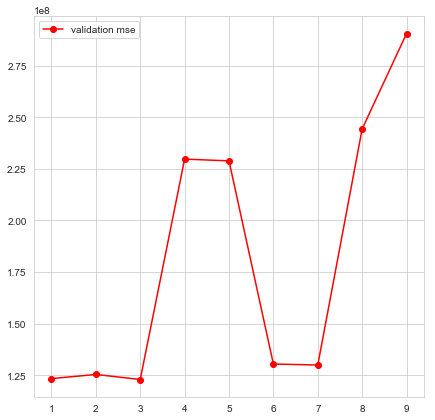

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_mse, color='red', marker='o', label='validation mse')
ax.legend(loc='best')
plt.show(fig)

In [30]:
best_model_idx, best_model_f1 = max(enumerate(validation_mse), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- mse (Test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))

- mse (Test) : 4.816e+08


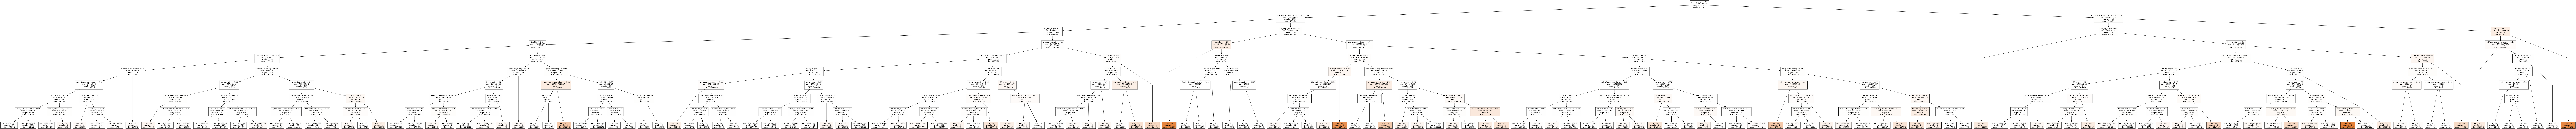

In [31]:
graph = Source(export_graphviz(dt_models[best_model_idx],
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)


In [26]:
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
print(imp[imp['importance'] != 0])

                         variables   importance
0                        timedelta     0.133702
1                   n_tokens_title    0.0112598
2                 n_tokens_content    0.0098781
3                  n_unique_tokens     0.031068
4                 n_non_stop_words  8.77546e-08
5         n_non_stop_unique_tokens     0.116362
6                        num_hrefs    0.0180319
7                   num_self_hrefs   0.00545361
8                         num_imgs     0.016898
9                       num_videos   0.00501581
10            average_token_length    0.0168526
11                    num_keywords   0.00304823
12       data_channel_is_lifestyle   0.00984885
13   data_channel_is_entertainment  0.000356518
14             data_channel_is_bus   0.00428108
15          data_channel_is_socmed  0.000197705
16            data_channel_is_tech   0.00223271
17           data_channel_is_world   0.00258056
18                      kw_min_min   0.00106862
19                      kw_max_min    0.

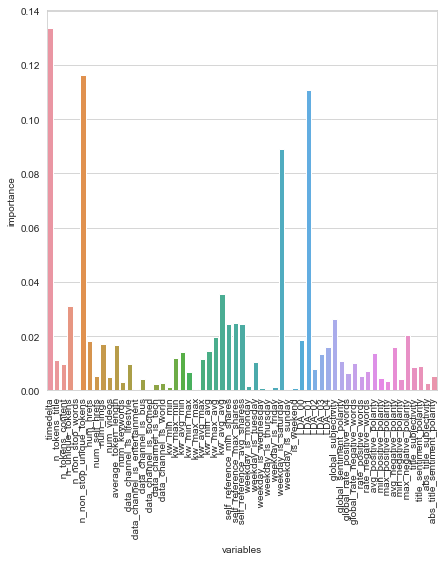

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)